# Clustering and visualization of DEC-generated models for the MNIST dataset
Before using this notebook, make sure you have installed the necessary environment, using the following command in the terminal, at the root of the directory :\
$pip install -r requirements.txt\
To save partitions and figures, uncomment *.to_csv()* and *.savefig()*.

## Bibliothèques utilisées

In [2]:
import sys
#Visualization libraries
from umap import UMAP
import matplotlib.pyplot as plt
import skfuzzy.cluster as skfc
from sklearn.manifold import TSNE

##DEC libraries 
from keras.models import Model, Sequential, load_model
from sklearn.cluster import KMeans
import DECscript

#MINST dataset library
import numpy as np
from keras.datasets import mnist

#Evaluation libraries
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

#Backup libraries
import pandas as pd

In [3]:
#Function to retrieve the Mnist dataset
def get_mnist():
    np.random.seed(1234) # set seed for deterministic ordering
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_all = np.concatenate((x_train, x_test), axis = 0)
    Y = np.concatenate((y_train, y_test), axis = 0)
    X = x_all.reshape(-1,x_all.shape[1]*x_all.shape[2])
    
    p = np.random.permutation(X.shape[0])
    X = X[p].astype(np.float32)*0.02
    Y = Y[p]
    return X, Y

In [4]:
#to use less than 10 classes, uncomment here #########################
#def get_mnist():
#   np.random.seed(1234) # set seed for deterministic ordering
#    (x_train, y_train), (x_test, y_test) = mnist.load_data()
#    train_filter = np.where((y_train == 0 ) | (y_train == 1))
#    X, Y = x_train[train_filter], y_train[train_filter]
#    X = X.reshape(-1,X.shape[1]*X.shape[2])
#    return X, Y

## Model prediction

We then load a previously generated model.

In [5]:
file_name='./models/setExample/models_mnist_111_s2048_01.h5'
model = load_model(file_name, custom_objects={'ClusteringLayer': DECscript.ClusteringLayer})
model_name = file_name[len('./models/'):-3]
print("model name: "+model_name)
model.summary()

None
model name: setExample/models_mnist_111_s2048_01
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 10)                1665010   
                                                                 
 clustering (ClusteringLaye  (None, 10)                100       
 r)                                                              
                                                                 
Total params: 1665110 (6.35 MB)
Trainable params: 1665110 (6.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
file_name2='./models/setExample/models_mnist_111_s2048_02.h5'
model2 = load_model(file_name2, custom_objects={'ClusteringLayer': DECscript.ClusteringLayer})
model_name2 = file_name2[len('./models/'):-3]
print("model name: "+model_name2)
model.summary()

None
model name: setExample/models_mnist_111_s2048_02
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 10)                1665010   
                                                                 
 clustering (ClusteringLaye  (None, 10)                100       
 r)                                                              
                                                                 
Total params: 1665110 (6.35 MB)
Trainable params: 1665110 (6.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Retrieve the MINST dataset. We'll take the values on X, and the associated labels on Y.

In [6]:
X, Y  = get_mnist()
print(X.shape)

(70000, 784)


The model prediction is generated on the MINST (X) data in the z vector.
We have : \
 **n_clusters** the expected number of clusters \
 **kl** the vector containing cluster names\
 **kmeans_cluster_centers** the vector containing cluster centers\
 **z** the latent space.
 
 
**Frequent error**: *The model proposes a lower number of clusters than requested*.
ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.

In [7]:
z = model.predict(X)
print('prediction 1')
kmeans = KMeans(n_clusters=10).fit(z)
kl = kmeans.labels_
kmeans_cluster_centers = kmeans.cluster_centers_

2188/2188 [==============================] - 7s 3ms/step
prediction 1


/home/jeanne/Documents/satge_limos/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jeanne/Documents/satge_limos/myenv/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [24]:
z2 = model2.predict(X)
print('prediction 2')
kmeans2 = KMeans(n_clusters=10).fit(z)
kl2 = kmeans2.labels_
kmeans_cluster_centers2 = kmeans2.cluster_centers_

2188/2188 [==============================] - 7s 3ms/step
prediction 2


/home/jeanne/Documents/satge_limos/myenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/jeanne/Documents/satge_limos/myenv/lib/python3.10/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


## Saving classification
To save the latent space, uncomment *z_data.to_csv()* .\
To save the clustering obtained from the model, uncomment *df_cluster.to_csv()*.

In [8]:
save_latent = 'data/model_mnist_s2048_111_Latent.csv'
z_data=pd.DataFrame(z)
#z_data.to_csv(save_latent)

In [9]:
save_clustering = 'data/cluster_setExample/df_cluster_m'+str(model_name)+'.csv'
df_cluster=pd.DataFrame(kl)
#df_cluster.to_csv('save_clustering,header=False, index=False)

## Evaluation and visualization

The silhouette score is used to assess the quality of separation.\
The *ARI* is used to assess the quality of clustering, by comparing the clusters obtained (*kl*) with the expected clusters (*Y*).\
In both cases, a score as close as possible to 1 is sought.

In [10]:
print('ARI_1vsMNIST = {}'.format(ARI(kl, Y)))
print('ARI_1vs2 = {}'.format(ARI(kl, kl2)))

print('silhouette score = {}'.format(silhouette_score(z, kmeans.labels_)))

ARI = 3.076629254677263e-05
silhouette score = 0.9879142642021179


We'll use UMAP and TSNE to visualize our results. A random seed (*random_state*) allows us to have a repeatable result, but will prevent parallelization.\
**Frequent error** : *appears when using a random seed, which prevents parallelization.\
warn(f "n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")

In [11]:
random_state=0
umap_2d = UMAP(n_components=2, init='random', random_state=random_state)
tsne_2d = TSNE(n_components=2)

In [12]:
%time proj_umap_2d_X = umap_2d.fit_transform(X)
%time proj_umap_2d_z = umap_2d.fit_transform(z)

/home/jeanne/Documents/satge_limos/myenv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 28s, sys: 2.33 s, total: 1min 30s
Wall time: 1min 2s


/home/jeanne/Documents/satge_limos/myenv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


CPU times: user 1min 40s, sys: 1.79 s, total: 1min 42s
Wall time: 1min 34s


In [13]:
%time proj_tsne_2d_X = tsne_2d.fit_transform(X)
%time proj_tsne_2d_z = tsne_2d.fit_transform(z)

CPU times: user 18min 25s, sys: 19.4 s, total: 18min 45s
Wall time: 5min 52s
CPU times: user 4min 22s, sys: 14 s, total: 4min 35s
Wall time: 3min 17s


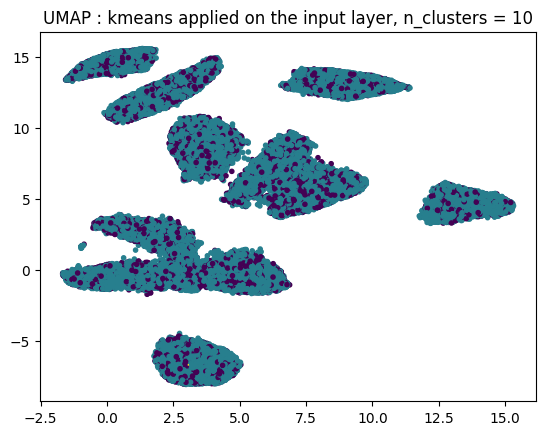

In [14]:
#Kmeans method applied to the input layer, UMAP visualization
plt.scatter(proj_umap_2d_X[:,0], proj_umap_2d_X[:,1], c=kmeans.predict(z), marker='.')
plt.title('UMAP : kmeans applied on the input layer, n_clusters = 10')
#plt.savefig('fig/umap_inputLayer_'+model_name+'_seed'+random_state+'.png')
plt.show()

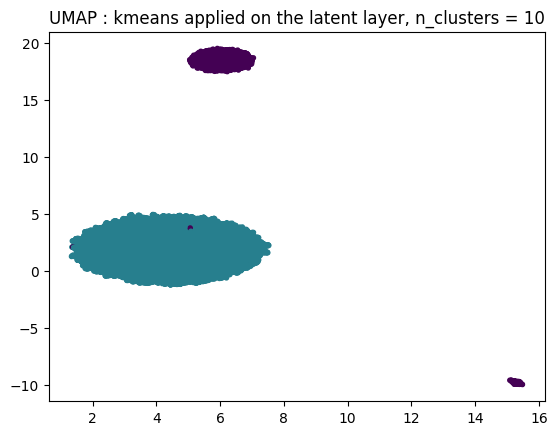

In [15]:
#Kmeans method applied to the latent layer, UMAP visualization
plt.scatter(proj_umap_2d_z[:,0], proj_umap_2d_z[:,1], c=kmeans.predict(z), marker='.')
plt.title('UMAP : kmeans applied on the latent layer, n_clusters = 10')
#plt.savefig(fig/umap_latentLayer_'+model_name+'_seed'+random_state+'.png')
plt.show()

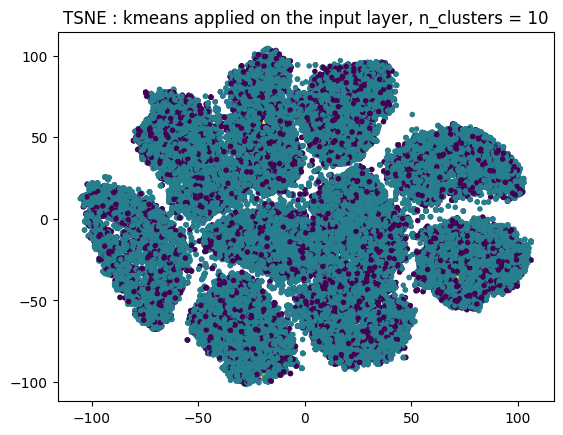

In [16]:
#Kmeans method applied to the input layer, TSNE visualization
plt.scatter(proj_tsne_2d_X[:,0], proj_tsne_2d_X[:,1], c=kmeans.predict(z), marker='.')
plt.title('TSNE : kmeans applied on the input layer, n_clusters = 10')
#plt.savefig(fig/tsne_inputLayer_'+model_name+'_seed'+random_state+'.png')
plt.show()

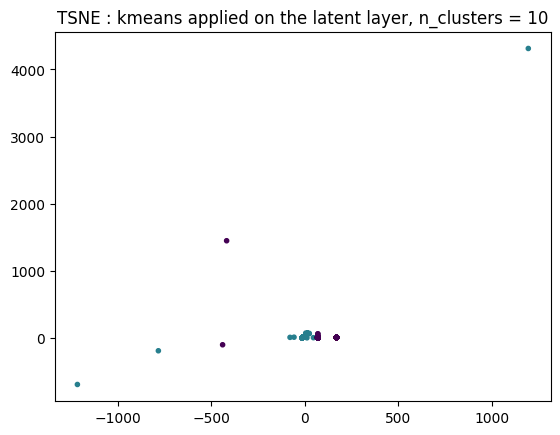

In [17]:
#Kmeans method applied to the latent layer, TSNE visualization
plt.scatter(proj_tsne_2d_z[:,0], proj_tsne_2d_z[:,1], c=kmeans.predict(z), marker='.')
plt.title('TSNE : kmeans applied on the latent layer, n_clusters = 10')
#plt.savefig(fig/tsne_latentLayer_'+model_name+'_seed'+random_state+'.png')
plt.show()

## PCA visualization

In [18]:
acp_z = PCA(2).fit(z)
print(acp_z.explained_variance_ratio_)

[9.99613855e-01 5.52872190e-16]


In [19]:
proj_2d_z = acp_z.transform(z)

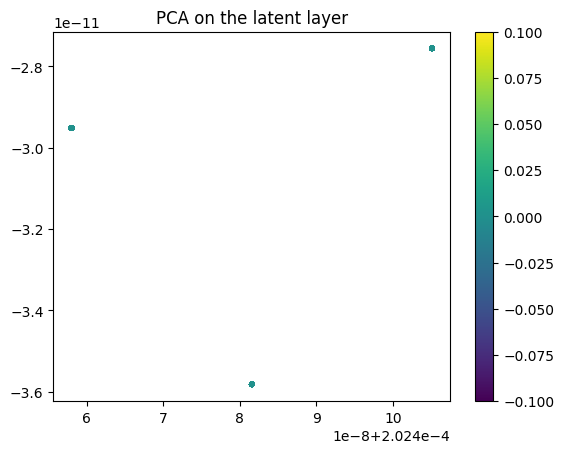

In [20]:
plt.title("PCA on the latent layer")
plt.scatter(proj_2d_z[:,0], proj_2d_z[:,1], c=np.argmax(z, axis=1), marker='.') #opacite = 1 - probabilité d'appartenir à la classe assigné
plt.colorbar()
plt.show()

In [21]:
acp_X = PCA(2).fit(X)
print(acp_X.explained_variance_ratio_)

[0.0974595  0.07155318]
